In [1]:
import numpy as np
from scipy.ndimage import map_coordinates

# Crear el array original como en IDL FINDGEN(4,4)
p = np.arange(16).reshape(4, 4)
print("Array original:")
print(p)

# Puntos de interpolación como en IDL
x_points = np.array([0.5, 1.5, 2.5])
y_points = np.array([0.5, 1.5, 2.5])

def idl_interpolate(array, x_points, y_points):
    """
    Replica el comportamiento de IDL's INTERPOLATE usando scipy.ndimage.map_coordinates
    
    Parámetros:
    array: numpy.ndarray - Array de entrada 2D
    x_points: numpy.ndarray - Coordenadas x para interpolación
    y_points: numpy.ndarray - Coordenadas y para interpolación
    
    Retorna:
    numpy.ndarray - Array interpolado
    """
    # Crear grid de coordenadas
    xx, yy = np.meshgrid(x_points, y_points)
    
    # Preparar coordenadas para map_coordinates
    coords = np.vstack((yy.flatten(), xx.flatten()))
    
    # Realizar la interpolación
    result = map_coordinates(array, coords, order=1, mode='nearest')
    return result.reshape(len(y_points), len(x_points))

# Aplicar interpolación
result = idl_interpolate(p, x_points, y_points)

print("\nResultado usando map_coordinates:")
print(result)

# Comparar con el resultado esperado de IDL
print("\nResultado esperado de IDL:")
expected = np.array([
    [2.5, 3.5, 4.5],
    [6.5, 7.5, 8.5],
    [10.5, 11.5, 12.5]
])
print(expected)

# Verificar diferencia
print("\nDiferencia con el resultado esperado:")
print(np.abs(result - expected))

Array original:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

Resultado usando map_coordinates:
[[ 3  4  5]
 [ 7  8  9]
 [11 12 13]]

Resultado esperado de IDL:
[[ 2.5  3.5  4.5]
 [ 6.5  7.5  8.5]
 [10.5 11.5 12.5]]

Diferencia con el resultado esperado:
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]


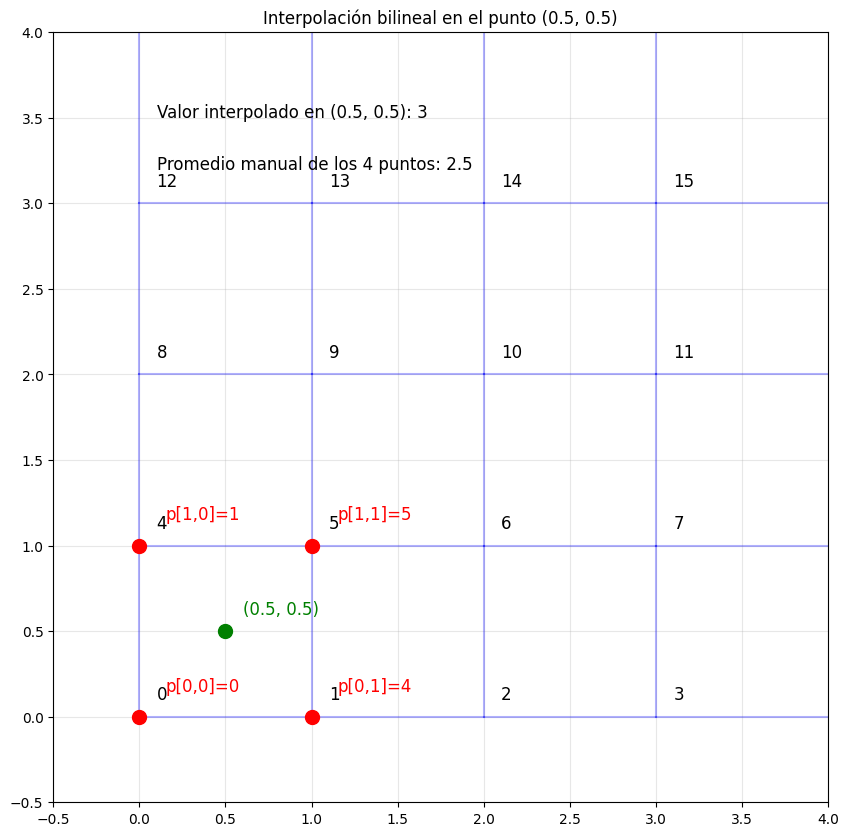

Valores en los puntos circundantes:
p[0,0] = 0
p[0,1] = 1
p[1,0] = 4
p[1,1] = 5

Valor interpolado: 3


In [2]:

import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

# Crear el array original
p = np.arange(16).reshape(4, 4)

# Definir el punto específico (0.5, 0.5)
x_point = np.array([0.5])
y_point = np.array([0.5])

# Visualizar el caso específico
plt.figure(figsize=(10, 10))

# Plotear la grilla original
for i in range(4):
    for j in range(4):
        plt.plot([i, i+1], [j, j], 'b-', alpha=0.3)  # líneas horizontales
        plt.plot([i, i], [j, j+1], 'b-', alpha=0.3)  # líneas verticales
        plt.text(i+0.1, j+0.1, f'{p[j,i]}', fontsize=12)

# Resaltar los cuatro puntos que rodean (0.5, 0.5)
points = [(0,0), (1,0), (0,1), (1,1)]
values = [p[y,x] for y,x in points]

for (x,y), val in zip(points, values):
    plt.plot(x, y, 'ro', markersize=10)
    plt.text(x+0.15, y+0.15, f'p[{y},{x}]={val}', fontsize=12, color='red')

# Marcar el punto (0.5, 0.5)
plt.plot(0.5, 0.5, 'go', markersize=10)
plt.text(0.6, 0.6, f'(0.5, 0.5)', fontsize=12, color='green')

# Calcular el valor interpolado
xx, yy = np.meshgrid(x_point, y_point)
coords = np.vstack((yy.flatten(), xx.flatten()))
interpolated_value = map_coordinates(p, coords, order=1, mode='nearest')[0]

# Calcular manualmente el promedio para verificar
manual_average = (p[0,0] + p[0,1] + p[1,0] + p[1,1]) / 4

plt.text(0.1, 3.5, f'Valor interpolado en (0.5, 0.5): {interpolated_value}', fontsize=12)
plt.text(0.1, 3.2, f'Promedio manual de los 4 puntos: {manual_average}', fontsize=12)

plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)
plt.title('Interpolación bilineal en el punto (0.5, 0.5)')
plt.show()

# Mostrar los cálculos
print("Valores en los puntos circundantes:")
print(f"p[0,0] = {p[0,0]}")
print(f"p[0,1] = {p[0,1]}")
print(f"p[1,0] = {p[1,0]}")
print(f"p[1,1] = {p[1,1]}")
print(f"\nValor interpolado: {interpolated_value}")

In [3]:
interpolated_value

np.int64(3)

Array original:
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]

1. Valor calculado manualmente: 2.5
2. Promedio simple de los 4 puntos: 2.5
3. Valor usando map_coordinates: 2.5


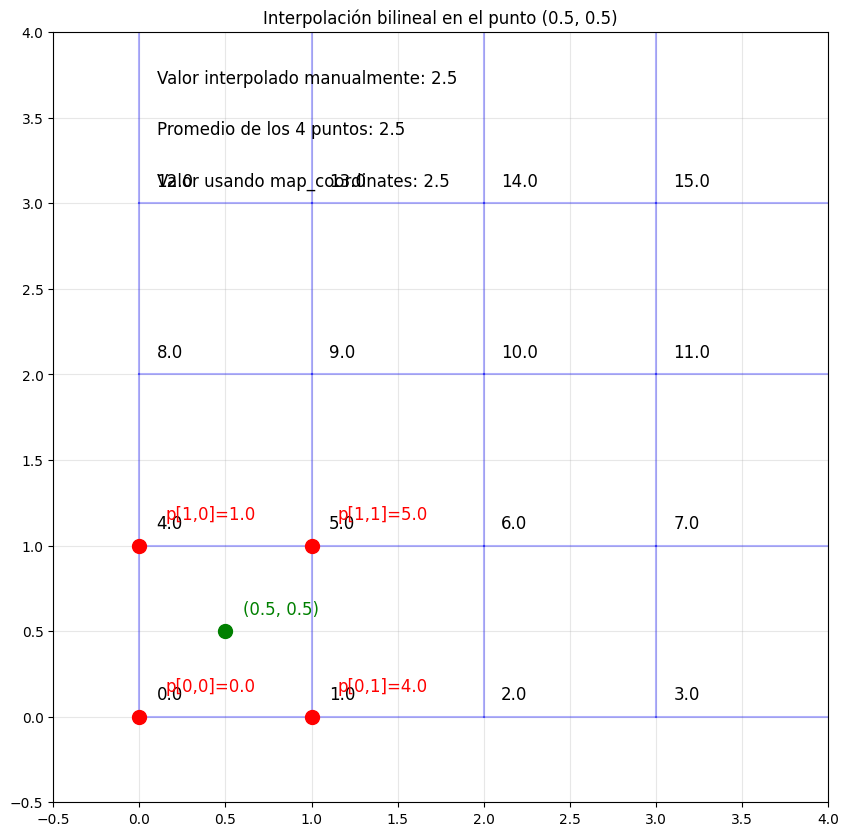

In [4]:
import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt

# Crear el array original
p = np.arange(16, dtype=np.float32).reshape(4, 4)

print("Array original:")
print(p)

# Manera directa de calcular el valor en (0.5, 0.5)
def manual_bilinear(p, x, y):
    """
    Calcula interpolación bilineal manualmente para verificar
    """
    x0, x1 = int(x), int(x) + 1
    y0, y1 = int(y), int(y) + 1
    
    # Pesos para x e y
    wx = x - x0
    wy = y - y0
    
    # Interpolación bilineal
    valor = (1-wx)*(1-wy)*p[y0,x0] + \
            wx*(1-wy)*p[y0,x1] + \
            (1-wx)*wy*p[y1,x0] + \
            wx*wy*p[y1,x1]
    
    return valor

# Probar diferentes formas de obtener el valor en (0.5, 0.5)

# 1. Usando manual_bilinear
valor_manual = manual_bilinear(p, 0.5, 0.5)
print("\n1. Valor calculado manualmente:", valor_manual)

# 2. Promedio simple de los 4 puntos (válido solo para punto central 0.5, 0.5)
promedio_simple = (p[0,0] + p[0,1] + p[1,0] + p[1,1]) / 4
print("2. Promedio simple de los 4 puntos:", promedio_simple)

# 3. Usando map_coordinates correctamente
def interpolate_point(p, x, y):
    """
    Interpola un punto usando map_coordinates
    """
    coords = np.array([[y], [x]])  # Notar el orden: primero y, luego x
    return map_coordinates(p, coords, order=1, mode='nearest')[0]

valor_map = interpolate_point(p, 0.5, 0.5)
print("3. Valor usando map_coordinates:", valor_map)

# Visualización
plt.figure(figsize=(10, 10))

# Plotear la grilla original
for i in range(4):
    for j in range(4):
        plt.plot([i, i+1], [j, j], 'b-', alpha=0.3)
        plt.plot([i, i], [j, j+1], 'b-', alpha=0.3)
        plt.text(i+0.1, j+0.1, f'{p[j,i]}', fontsize=12)

# Resaltar los cuatro puntos que rodean (0.5, 0.5)
points = [(0,0), (1,0), (0,1), (1,1)]
values = [p[y,x] for y,x in points]

for (x,y), val in zip(points, values):
    plt.plot(x, y, 'ro', markersize=10)
    plt.text(x+0.15, y+0.15, f'p[{y},{x}]={val}', fontsize=12, color='red')

plt.plot(0.5, 0.5, 'go', markersize=10)
plt.text(0.6, 0.6, '(0.5, 0.5)', fontsize=12, color='green')

# Mostrar todos los valores calculados
plt.text(0.1, 3.7, f'Valor interpolado manualmente: {valor_manual}', fontsize=12)
plt.text(0.1, 3.4, f'Promedio de los 4 puntos: {promedio_simple}', fontsize=12)
plt.text(0.1, 3.1, f'Valor usando map_coordinates: {valor_map}', fontsize=12)

plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 4)
plt.title('Interpolación bilineal en el punto (0.5, 0.5)')
plt.show()

In [5]:
import numpy as np
from scipy.ndimage import map_coordinates

# Crear los mismos datos en diferentes tipos
p_int = np.arange(16).reshape(4, 4)
p_float32 = np.arange(16, dtype=np.float32).reshape(4, 4)
p_float64 = np.arange(16, dtype=np.float64).reshape(4, 4)

def interpolate_point(p, x, y):
    """
    Interpola un punto usando map_coordinates
    """
    coords = np.array([[y], [x]])  # Orden correcto: primero y, luego x
    return map_coordinates(p, coords, order=1, mode='nearest')[0]

# Punto de prueba
x, y = 0.5, 0.5

# Probar con diferentes tipos de datos
result_int = interpolate_point(p_int, x, y)
result_float32 = interpolate_point(p_float32, x, y)
result_float64 = interpolate_point(p_float64, x, y)

print("Comparación de tipos de datos y resultados:")
print(f"\nMatriz de enteros (int64):")
print(f"Tipo de datos: {p_int.dtype}")
print(f"Valor interpolado: {result_int}")

print(f"\nMatriz de float32:")
print(f"Tipo de datos: {p_float32.dtype}")
print(f"Valor interpolado: {result_float32}")

print(f"\nMatriz de float64:")
print(f"Tipo de datos: {p_float64.dtype}")
print(f"Valor interpolado: {result_float64}")

# Verificación manual del promedio para cada tipo
print("\nVerificación manual de los 4 puntos cercanos:")
points = [(0,0), (0,1), (1,0), (1,1)]
print(f"Enteros: {[p_int[y,x] for y,x in points]} -> Promedio = {sum(p_int[y,x] for y,x in points)/4}")
print(f"Float32: {[p_float32[y,x] for y,x in points]} -> Promedio = {sum(p_float32[y,x] for y,x in points)/4}")
print(f"Float64: {[p_float64[y,x] for y,x in points]} -> Promedio = {sum(p_float64[y,x] for y,x in points)/4}")

Comparación de tipos de datos y resultados:

Matriz de enteros (int64):
Tipo de datos: int64
Valor interpolado: 3

Matriz de float32:
Tipo de datos: float32
Valor interpolado: 2.5

Matriz de float64:
Tipo de datos: float64
Valor interpolado: 2.5

Verificación manual de los 4 puntos cercanos:
Enteros: [np.int64(0), np.int64(1), np.int64(4), np.int64(5)] -> Promedio = 2.5
Float32: [np.float32(0.0), np.float32(1.0), np.float32(4.0), np.float32(5.0)] -> Promedio = 2.5
Float64: [np.float64(0.0), np.float64(1.0), np.float64(4.0), np.float64(5.0)] -> Promedio = 2.5


In [6]:
import numpy as np
from scipy.ndimage import map_coordinates

# Crear matriz 6x6 equivalente a FINDGEN(6,6)
p = np.arange(36, dtype=np.float32).reshape(6, 6)
print("Array original (6x6):")
print(p)

# Puntos de interpolación como en IDL
x_points = np.array([0.5, 1.5, 2.5])
y_points = np.array([0.5, 1.5, 3.5])

def interpolate_grid(array, x_points, y_points):
    """
    Realiza interpolación similar a INTERPOLATE de IDL con la opción /GRID
    """
    xx, yy = np.meshgrid(x_points, y_points)
    coords = np.vstack((yy.flatten(), xx.flatten()))
    result = map_coordinates(array, coords, order=1, mode='nearest')
    return result.reshape(len(y_points), len(x_points))

# Realizar interpolación
result = interpolate_grid(p, x_points, y_points)

print("\nResultado de la interpolación:")
for row in result:
    print(" ".join(f"{x:10.5f}" for x in row))

# Verificación manual de algunos puntos
print("\nVerificación de valores interpolados:")
print(f"Para el punto (0.5, 0.5):")
print(f"Valores circundantes: {p[0,0]}, {p[0,1]}, {p[1,0]}, {p[1,1]}")
print(f"Promedio esperado: {(p[0,0] + p[0,1] + p[1,0] + p[1,1])/4}")
print(f"Valor interpolado: {result[0,0]}")

Array original (6x6):
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35.]]

Resultado de la interpolación:
   3.50000    4.50000    5.50000
   9.50000   10.50000   11.50000
  21.50000   22.50000   23.50000

Verificación de valores interpolados:
Para el punto (0.5, 0.5):
Valores circundantes: 0.0, 1.0, 6.0, 7.0
Promedio esperado: 3.5
Valor interpolado: 3.5
